# KAIST Summer Session 2018

## MNIST Classifier using Neural Network (08.16.2018)


- MNIST dataset (Modified National Institute of Standards and Technology database) has ten classes of handwritten digits from 0 to 9.

### 0. Data Preparation

In [1]:
import torch
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt


# Training settings
batch_size = 64

# MNIST Dataset
train_dataset = torchvision.datasets.MNIST(root='./mnist_data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = torchvision.datasets.MNIST(root='./mnist_data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

- Let's look inside the MNIST dataset

       7     5     0     5     6     4     0     9
       3     9     7     7     0     4     0     8
       4     2     6     2     4     6     3     0
       3     4     6     5     2     1     1     5
       5     9     8     1     1     3     4     7
       5     2     8     1     3     4     7     5
       0     5     5     4     8     9     2     2
       8     7     4     9     6     0     1     4


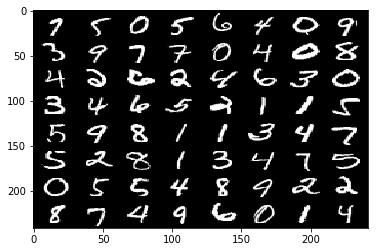

In [2]:
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), aspect='auto')


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

for i in range(8):
    print('  ', ' '.join('%5s' % classes[labels[j+i*8]] for j in range(8)))
    i += 1

### 1. Define a Neural Network

In [3]:
class Net(torch.nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.l1 = torch.nn.Linear(784, 320)
        self.l2 = torch.nn.Linear(320, 120)
        self.l3 = torch.nn.Linear(120, 10)

    def forward(self, x):
        x = x.view(-1, 784)      # Flatten the data (n, 1, 28, 28)-> (n, 784)
        x = F.relu(self.l1(x))   # compare to x = F.sigmoid(self.l1(x))
        x = F.relu(self.l2(x))   # compare to x = F.sigmoid(self.l2(x))
        x = self.l3(x)
        return x

### 2. Define a Loss Function and Optimizer

In [4]:
# Instantiate NN model
model = Net()

# Set loss and optimizer function
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

### 3. Training

In [5]:
n_epochs = 2

for epoch in range(1, n_epochs+1):     
    # Training
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = torch.tensor(data), torch.tensor(target)
                  
        output = model(data)
        loss = criterion(output, target)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))
    
print("Learning finished!")

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.291799
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.218793
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.977582
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.403443
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.945856
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.726121
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.557935
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.464657
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.688840
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.549397
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.489078
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.362532
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.329235
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.403091
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.225755
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.428234
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.236751
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.340892
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.296335
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.302029
Learning fin

### 4. Evaluation

In [6]:
# Evaluation
    
test_loss = 0
correct = 0
for data, target in test_loader:
    data, target = torch.tensor(data), torch.tensor(target)
    output = model(data)
    # sum up batch loss
    test_loss += criterion(output, target).data.item()
    # get the index of the max
    pred = output.data.max(1, keepdim=True)[1]
    correct += pred.eq(target.data.view_as(pred)).cpu().sum()

test_loss /= len(test_loader.dataset)
print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))

Test set: Average loss: 0.0049, Accuracy: 9117/10000 (91%)



- Let's see how the model works well


        --------Truth-------- 

       7     2     1     0     4     1     4     9
       5     9     0     6     9     0     1     5
       9     7     3     4     9     6     6     5
       4     0     7     4     0     1     3     1
       3     4     7     2     7     1     2     1
       1     7     4     2     3     5     1     2
       4     4     6     3     5     5     6     0
       4     1     9     5     7     8     9     3

        ------Predicted------ 

       7     2     1     0     4     1     4     9
       6     9     0     6     9     0     1     5
       9     7     3     4     9     6     6     5
       4     0     7     4     0     1     3     1
       3     6     7     2     7     1     2     1
       1     7     4     2     3     5     1     2
       4     4     6     3     5     5     6     0
       4     1     9     5     7     8     4     3


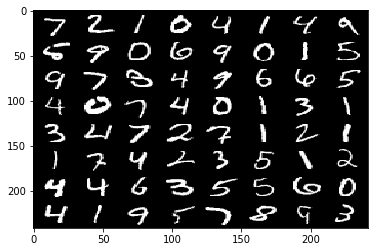

In [7]:
# get some random test images
dataiter_test = iter(test_loader)
images_test, labels_test = dataiter_test.next()

# show images
imshow(torchvision.utils.make_grid(images_test))

print('\n       ', '--------Truth--------', '\n')
for i in range(8):
    print('  ', ' '.join('%5s' % classes[labels_test[j+i*8]] for j in range(8)))
    i += 1
    
    
output = model(images_test)
_, predicted = torch.max(output, 1)

print('\n       ', '------Predicted------', '\n')
for i in range(8):
    print('  ', ' '.join('%5s' % classes[predicted[j+i*8]] for j in range(8)))
    i += 1